<a href="https://colab.research.google.com/github/nandaw/medgemma_experiments/blob/main/notebooks/quick_start_with_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

~~~
Copyright 2025 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
~~~

#Esse notebook foi modificado para fins educacionais

# Quick start with Hugging Face

<table><tbody><tr>
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/google-health/medgemma/blob/main/notebooks/quick_start_with_hugging_face.ipynb">
      <img alt="Google Colab logo" src="https://www.tensorflow.org/images/colab_logo_32px.png" width="32px"><br> Run in Google Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2Fgoogle-health%2Fmedgemma%2Fmain%2Fnotebooks%2Fquick_start_with_hugging_face.ipynb">
      <img alt="Google Cloud Colab Enterprise logo" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" width="32px"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/google-health/medgemma/blob/main/notebooks/quick_start_with_hugging_face.ipynb">
      <img alt="GitHub logo" src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" width="32px"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://huggingface.co/collections/google/medgemma-release-680aade845f90bec6a3f60c4">
      <img alt="HuggingFace logo" src="https://huggingface.co/front/assets/huggingface_logo-noborder.svg" width="32px"><br> View on HuggingFace
    </a>
  </td>
</tr></tbody></table>

This notebook provides a basic demo of using MedGemma, a collection of Gemma 3 variants that are trained for performance on medical text and image comprehension. MedGemma is intended to accelerate building healthcare-based AI applications.

Learn more about the model at the [HAI-DEF developer site](https://developers.google.com/health-ai-developer-foundations/medgemma).

## Setup

To complete this tutorial, you'll need to have a runtime with [sufficient resources](https://ai.google.dev/gemma/docs/core#sizes) to run the MedGemma model.

You can try out MedGemma 4B for free in Google Colab using a T4 GPU:

1. In the upper-right of the Colab window, select **▾ (Additional connection options)**.
2. Select **Change runtime type**.
3. Under **Hardware accelerator**, select **T4 GPU**.

**Note**: To run the demo with MedGemma 27B in Google Colab, you will need a runtime with an A100 GPU and use 4-bit quantization to reduce memory usage. The performance of quantized versions has not been evaluated.

### Get access to MedGemma

Before you get started, make sure that you have access to MedGemma models on Hugging Face:

1. If you don't already have a Hugging Face account, you can create one for free by clicking [here](https://huggingface.co/join).
2. Head over to the [MedGemma model page](https://huggingface.co/google/medgemma-4b-it) and accept the usage conditions.

### Authenticate with Hugging Face

Generate a Hugging Face `read` access token by going to [settings](https://huggingface.co/settings/tokens).

If you are using Google Colab, add your access token to the Colab Secrets manager to securely store it. If not, proceed to run the cell below to authenticate with Hugging Face.

1. Open your Google Colab notebook and click on the 🔑 Secrets tab in the left panel. <img src="https://storage.googleapis.com/generativeai-downloads/images/secrets.jpg" alt="The Secrets tab is found on the left panel." width=50%>
2. Create a new secret with the name `HF_TOKEN`.
3. Copy/paste your token key into the Value input box of `HF_TOKEN`.
4. Toggle the button on the left to allow notebook access to the secret.

### Install dependencies

In [ ]:
! pip install --upgrade --quiet accelerate bitsandbytes transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.8 MB/s eta 0:00:00


## Set model variant and configuration

In [ ]:
from transformers import BitsAndBytesConfig
import torch

model_variant = "4b-it"  # @param ["4b-it", "27b-text-it"]
model_id = f"google/medgemma-{model_variant}"

use_quantization = True  # @param {type: "boolean"}

# Nesse tutorial utilizaremos somente a variante 4B

<!--  @markdown Set `is_thinking` to `True` to turn on thinking mode. **Note:** Thinking is supported for the 27B variant only.-->
# is_thinking = False  # @param {type: "boolean"}

# If running the 27B variant in Google Colab, check if the runtime satisfies
# memory requirements
# if "27b" in model_variant and google_colab:
#     if not ("A100" in torch.cuda.get_device_name(0) and use_quantization):
#         raise ValueError(
#             "Runtime has insufficient memory to run the 27B variant. "
#             "Please select an A100 GPU and use 4-bit quantization."
#         )

model_kwargs = dict(
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

if use_quantization:
    model_kwargs["quantization_config"] = BitsAndBytesConfig(load_in_4bit=True)

## Run inference on images and text

This section demonstrates running inference on image-based tasks using multimodal variants.

<!-- **Note:** Proceed to [Run inference on text only](#scrollTo=tcyXG4lTpY4X) if you have selected the 27B text-only variant. -->

In [ ]:
# if "text" in model_variant:
#     raise ValueError(
#         "You are using a text-only variant which does not support multimodal "
#         "inputs. Please proceed to the 'Run inference on text only' section."
#     )

**Specify image and text inputs**

In [ ]:
import os
from PIL import Image
from IPython.display import Image as IPImage, display, Markdown

prompt = "Describe this mammogram"  # @param {type: "string"}

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image_url = "https://cdn.apollohospitals.com/health-library-prod/2021/08/Breast-Calcifications-scaled.jpg"  # @param {type: "string"}
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)

**Format conversation**

In [ ]:
system_instruction = "You are an expert radiologist."

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image", "image": image}
        ]
    }
]

The following standalone examples demonstate how to use the model both directly and with the [`pipeline`](https://huggingface.co/docs/transformers/en/main_classes/pipelines) API. The `pipeline` API provides a simple way to use the model for inference while abstracting away complex details,  while directly using the model gives you complete control over the inference process, including preprocessing and postprocessing. In practice, you should select the method that is best suited for your use case.

**Run model with the `pipeline` API**

In [ ]:
from transformers import pipeline

pipe = pipeline(
    "image-text-to-text",
    model=model_id,
    model_kwargs=model_kwargs,
)

pipe.model.generation_config.do_sample = False

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


---

**[ User ]**

Describe this mammogram

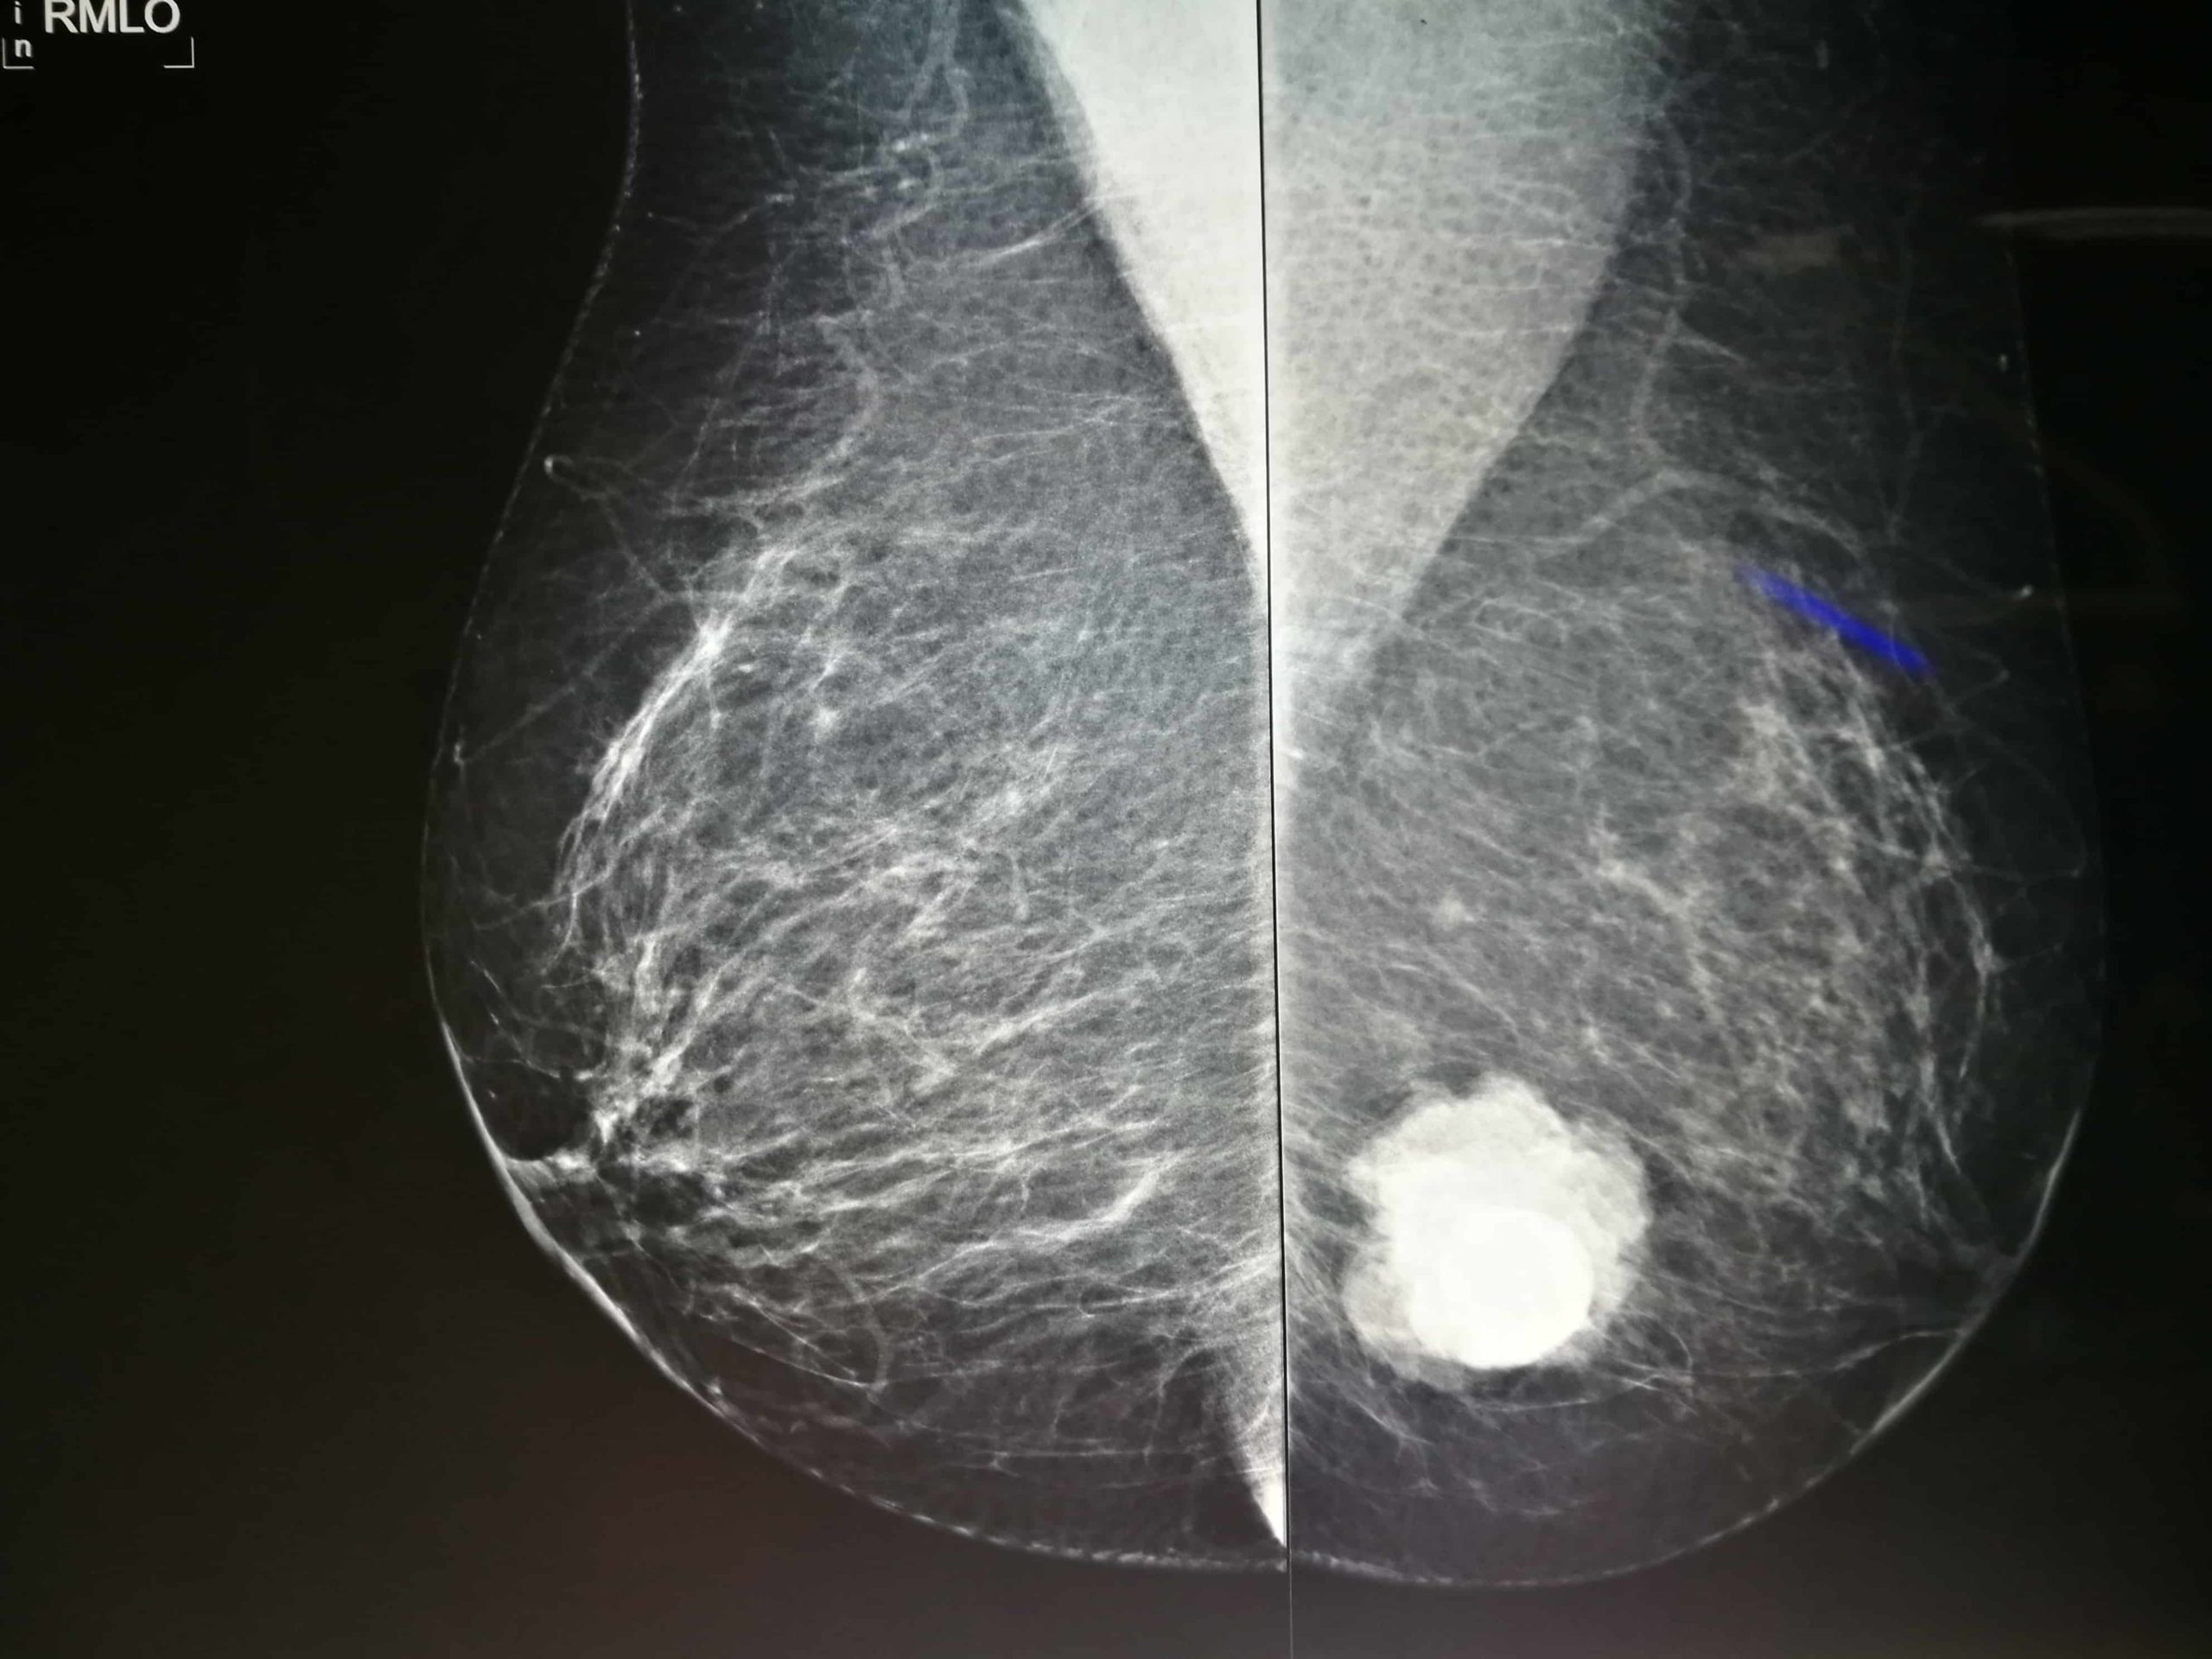

---

**[ MedGemma ]**

Okay, I've reviewed the mammogram image. Here's a description of what I see:

**Overall Impression:**

The image shows a normal-appearing breast with a clear distinction between the breast tissue and the skin. There are no obvious signs of a mass or lesion.

**Specific Findings:**

*   **Breast Tissue:** The breast tissue appears relatively uniform in density, with a normal pattern of fibroglandular tissue.
*   **Skin:** The skin appears smooth and without any obvious skin thickening or lesions.
*   **No Mass:** There is no obvious mass or lesion identified within the breast tissue.

**Conclusion:**

Based on the current mammogram image, there are no obvious signs of a breast lesion or mass.

**Important Considerations:**

*   This is a single view. A full evaluation requires comparison with prior mammograms (if available) and potentially additional views (e.g., mediolateral oblique (MLO) views) to fully assess the breast tissue.
*   This interpretation is based solely on the provided image. A complete evaluation requires a radiologist's expertise and consideration of the patient's clinical history.

**Disclaimer:** This is an interpretation of a single mammogram image and should not be considered a definitive diagnosis. A qualified radiologist must evaluate the entire study in the context of the patient's clinical history and perform any necessary follow-up imaging.


---

In [ ]:
output = pipe(text=messages, max_new_tokens=300)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

In [ ]:
prompt = "Describe this mammogram"  # @param {type: "string"}

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image_url = "https://www.mdanderson.org/content/mda/en/cancerwise/2021/11/4-questions-about-breast-calcifications--answered/jcr:content/blog/adaptiveimage.resize.648.0.medium.jpg/1637245333641.jpg"  # @param {type: "string"}
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)

The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


---

**[ User ]**

Describe this mammogram

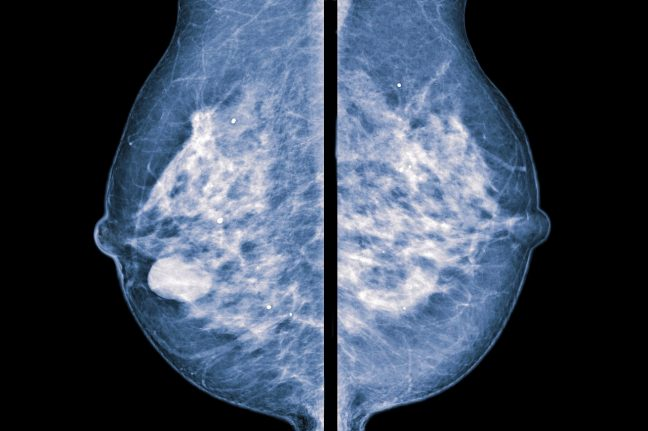

---

**[ MedGemma ]**

Okay, I've reviewed the mammogram image. Here's a description of what I see:

**Overall Impression:**

The image shows a normal-appearing breast with a clear distinction between the breast tissue and the skin. There are no obvious signs of a mass or lesion.

**Specific Findings:**

*   **Breast Tissue:** The breast tissue appears relatively uniform in density, with a normal pattern of fibroglandular tissue.
*   **Skin:** The skin appears smooth and without any obvious skin thickening or lesions.
*   **No Mass:** There is no obvious mass or lesion identified within the breast tissue.

**Conclusion:**

Based on the current mammogram image, there are no obvious signs of a breast lesion or mass.

**Important Considerations:**

*   This is a single view. A full evaluation requires comparison with prior mammograms (if available) and potentially additional views (e.g., mediolateral oblique (MLO) views) to fully assess the breast tissue.
*   This interpretation is based solely on the provided image. A complete evaluation requires a radiologist's expertise and consideration of the patient's clinical history.

**Disclaimer:** This is an interpretation of a single mammogram image and should not be considered a definitive diagnosis. A qualified radiologist must evaluate the entire study in the context of the patient's clinical history and perform any necessary follow-up imaging.


---

In [ ]:
output = pipe(text=messages, max_new_tokens=300)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

In [ ]:
prompt = "Describe this mammogram. Tell which views are in the image"  # @param {type: "string"}

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image_url = "https://ars.els-cdn.com/content/image/1-s2.0-S1930043317300948-radcr284-fig-0001.jpg"  # @param {type: "string"}
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)

The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


---

**[ User ]**

Describe this mammogram

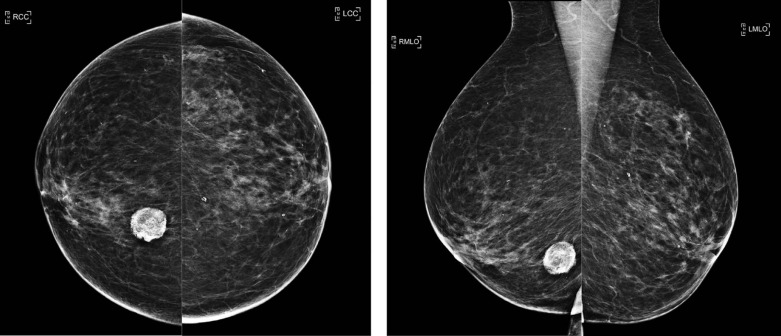

---

**[ MedGemma ]**

Okay, I've reviewed the mammogram image. Here's a description of what I see:

**Overall Impression:**

The image shows a normal-appearing breast with a clear distinction between the breast tissue and the skin. There are no obvious signs of a mass or lesion.

**Specific Findings:**

*   **Breast Tissue:** The breast tissue appears relatively uniform in density, with a normal pattern of fibroglandular tissue.
*   **Skin:** The skin appears smooth and without any obvious skin thickening or lesions.
*   **No Mass:** There is no obvious mass or lesion identified within the breast tissue.

**Conclusion:**

Based on the current mammogram image, there are no obvious signs of a breast lesion or mass.

**Important Considerations:**

*   This is a single view. A full evaluation requires comparison with prior mammograms (if available) and potentially additional views (e.g., mediolateral oblique (MLO) views) to fully assess the breast tissue.
*   This interpretation is based solely on the provided image. A complete evaluation requires a radiologist's expertise and consideration of the patient's clinical history.

**Disclaimer:** This is an interpretation of a single mammogram image and should not be considered a definitive diagnosis. A qualified radiologist must evaluate the entire study in the context of the patient's clinical history and perform any necessary follow-up imaging.


---

In [ ]:

output = pipe(text=messages, max_new_tokens=300)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

**Run the model directly**

In [ ]:
from transformers import AutoModelForImageTextToText, AutoProcessor

model = AutoModelForImageTextToText.from_pretrained(
    model_id,
    **model_kwargs,
)
processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


---

**[ User ]**

Describe this mammogram. Tell which views are in the image

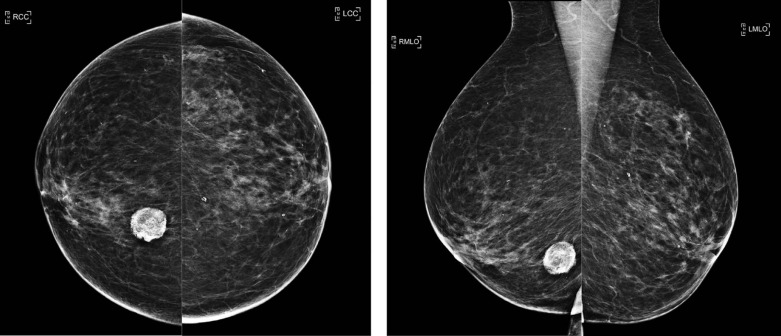

---

**[ MedGemma ]**

Okay, I've reviewed the mammogram image. Here's a description of what I see:

**Overall Impression:**

The image shows a normal-appearing breast with a clear distinction between the breast tissue and the skin. There are no obvious signs of a mass or lesion.

**Specific Findings:**

*   **Breast Tissue:** The breast tissue appears relatively uniform in density, with a normal pattern of fibroglandular tissue.
*   **Skin:** The skin appears smooth and without any obvious skin thickening or lesions.
*   **No Mass:** There is no obvious mass or lesion identified within the breast tissue.

**Conclusion:**

Based on the current mammogram image, there are no obvious signs of a breast lesion or mass.

**Important Considerations:**

*   This is a single view. A full evaluation requires comparison with prior mammograms (if available) and potentially additional views (e.g., mediolateral oblique (MLO) views) to fully assess the breast tissue.
*   This interpretation is based solely on the provided image. A complete evaluation requires a radiologist's expertise and consideration of the patient's clinical history.

**Disclaimer:** This is an interpretation of a single mammogram image and should not be considered a definitive diagnosis. A qualified radiologist must evaluate the entire study in the context of the patient's clinical history and perform any necessary follow-up imaging.


---

In [ ]:
inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device, dtype=torch.bfloat16)

input_len = inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**inputs, max_new_tokens=300, do_sample=False)
    generation = generation[0][input_len:]

response = processor.decode(generation, skip_special_tokens=True)

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

# Next steps

Continue to the fine tuning [notebook](https://colab.research.google.com/github/google-health/medgemma/blob/main/notebooks/fine_tune_with_hugging_face.ipynb) to learn how to fine tune MedGemma.